In [0]:
import numpy as np


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

In [0]:
CUDA = True
BATCH_SIZE = 64

In [0]:
# Define Train loader
train_tensors = original_train_dataset.data.float() / 255
test_tensors = original_test_dataset.data.float() / 255

train_dataset = torch.utils.data.TensorDataset(train_tensors, original_train_dataset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, original_test_dataset.targets)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
# [CHANGED] Add dropout layer to introduce diversity in gradients
# [CHANGED] [Important] Use LeakyReLU since it keeps gradients better
discriminator = nn.Sequential(
    nn.Dropout(),
    nn.Linear(784, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 128),
    nn.LeakyReLU(0.2),
    nn.Linear(128, 64),
    nn.Dropout(),
    nn.LeakyReLU(0.2),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

In [0]:
# [CHANGED] [Important] Use LeakyReLU since it keeps noise better
generator = nn.Sequential(
    nn.Linear(128, 128),
    nn.LeakyReLU(0.2),
    nn.Linear(128, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 512),
    nn.LeakyReLU(0.2),
    nn.Linear(512, 784),
    nn.Sigmoid()
)

In [0]:
if CUDA:
  discriminator.cuda()
  generator.cuda()

In [0]:
LEARNING_RATE_D = 0.0002
LEARNING_RATE_G = 0.0002


opt_D = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE_D)
opt_G = optim.Adam(generator.parameters(), lr=LEARNING_RATE_G)

In [0]:
N_EPOCH = 100

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 3) # set default size of plots

epoch: 0 	 last batch loss D: 0.8265009522438049 	 last batch loss G: 3.8329639434814453


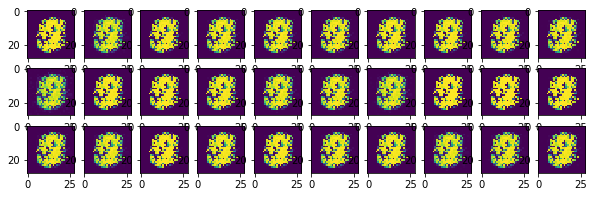

epoch: 1 	 last batch loss D: 0.0501953661441803 	 last batch loss G: 4.757076263427734


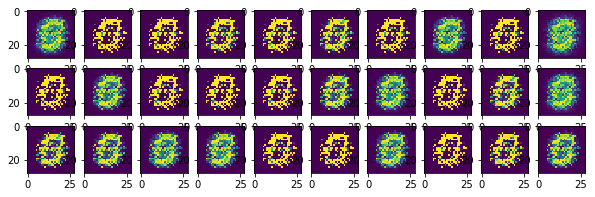

epoch: 2 	 last batch loss D: 0.20271900296211243 	 last batch loss G: 4.562911033630371


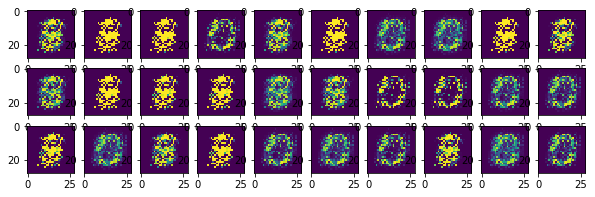

epoch: 3 	 last batch loss D: 0.32252979278564453 	 last batch loss G: 4.837007999420166


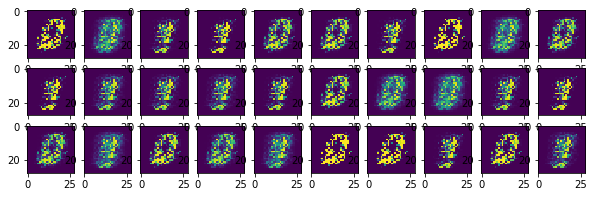

epoch: 4 	 last batch loss D: 0.46138423681259155 	 last batch loss G: 4.435108661651611


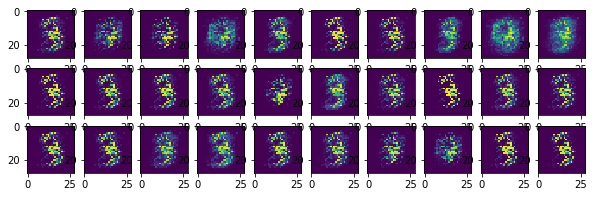

epoch: 5 	 last batch loss D: 0.4257216155529022 	 last batch loss G: 2.9698195457458496


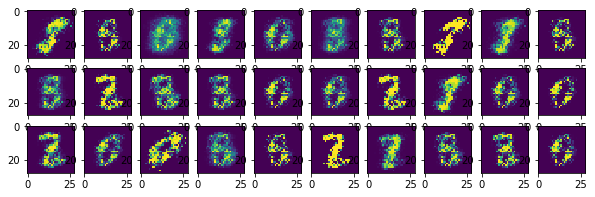

epoch: 6 	 last batch loss D: 0.6101471781730652 	 last batch loss G: 2.9226670265197754


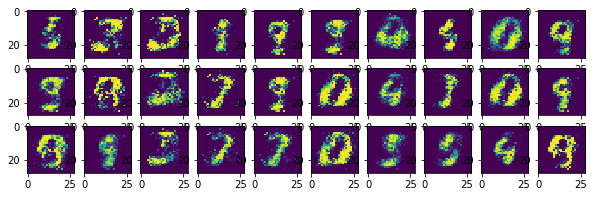

epoch: 7 	 last batch loss D: 0.7325964570045471 	 last batch loss G: 2.7690019607543945


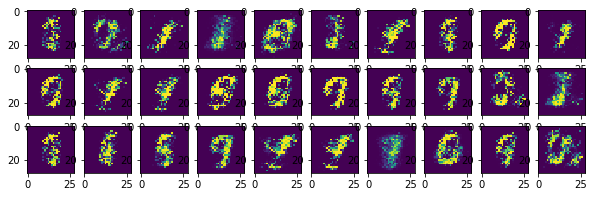

epoch: 8 	 last batch loss D: 0.596050500869751 	 last batch loss G: 3.050487518310547


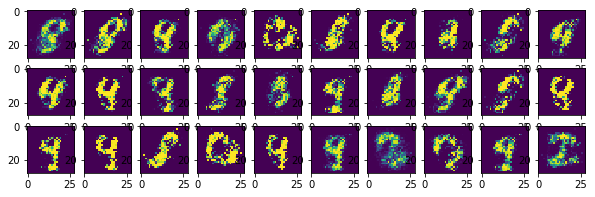

epoch: 9 	 last batch loss D: 0.8472617864608765 	 last batch loss G: 2.930734872817993


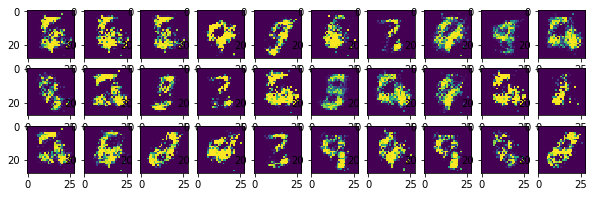

epoch: 10 	 last batch loss D: 0.49331769347190857 	 last batch loss G: 2.0935187339782715


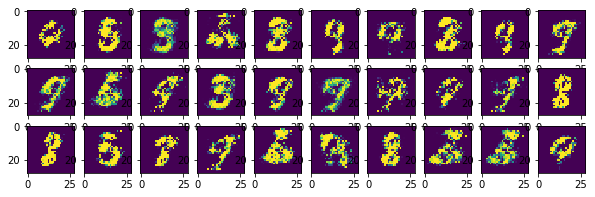

epoch: 11 	 last batch loss D: 0.8894376754760742 	 last batch loss G: 2.4783172607421875


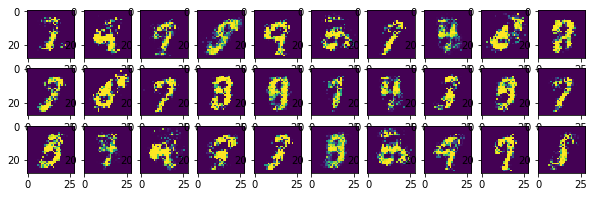

epoch: 12 	 last batch loss D: 0.6243972182273865 	 last batch loss G: 2.404716730117798


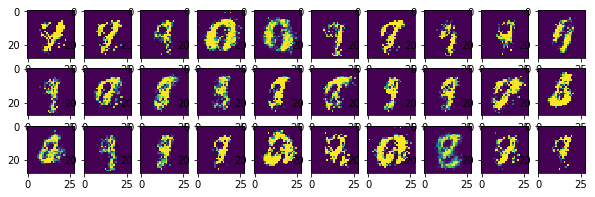

epoch: 13 	 last batch loss D: 0.48663169145584106 	 last batch loss G: 2.435065746307373


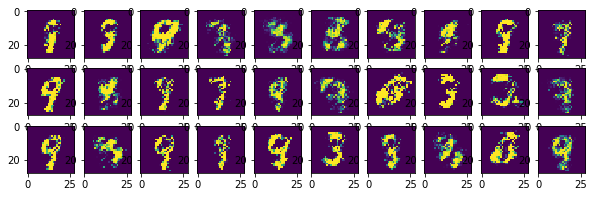

epoch: 14 	 last batch loss D: 0.7291526794433594 	 last batch loss G: 2.525106430053711


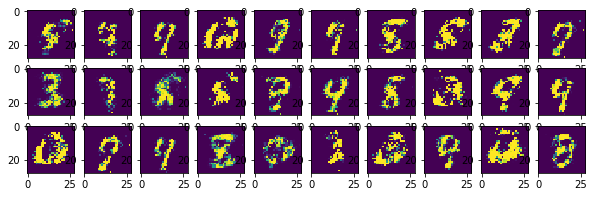

epoch: 15 	 last batch loss D: 0.6636346578598022 	 last batch loss G: 1.9212963581085205


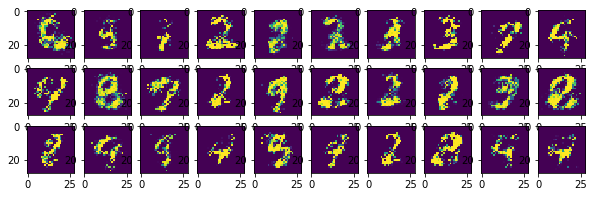

epoch: 16 	 last batch loss D: 0.5421997308731079 	 last batch loss G: 2.2678587436676025


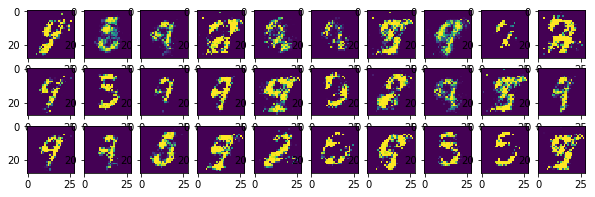

epoch: 17 	 last batch loss D: 0.7159197330474854 	 last batch loss G: 2.219554901123047


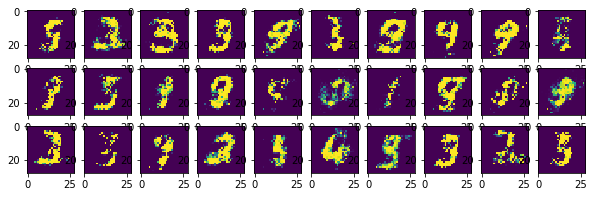

epoch: 18 	 last batch loss D: 0.5869985222816467 	 last batch loss G: 1.9697439670562744


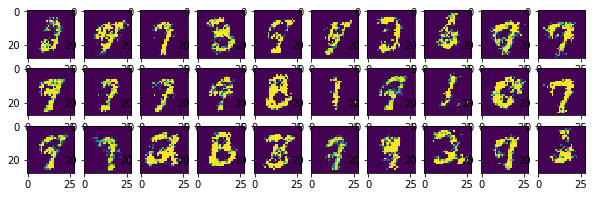

epoch: 19 	 last batch loss D: 0.7943548560142517 	 last batch loss G: 1.527345895767212


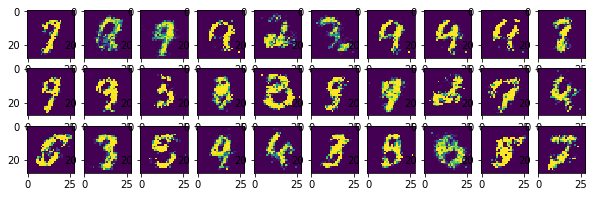

epoch: 20 	 last batch loss D: 0.9114316701889038 	 last batch loss G: 1.3461366891860962


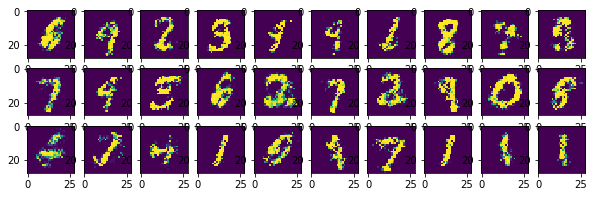

epoch: 21 	 last batch loss D: 0.7181485891342163 	 last batch loss G: 1.8311970233917236


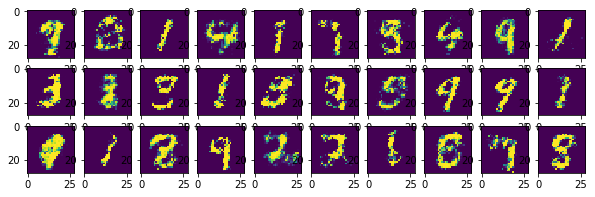

epoch: 22 	 last batch loss D: 1.0512363910675049 	 last batch loss G: 1.5799412727355957


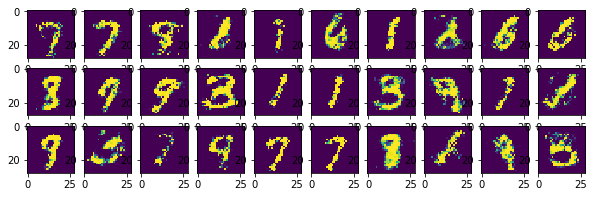

epoch: 23 	 last batch loss D: 1.1501394510269165 	 last batch loss G: 1.4052635431289673


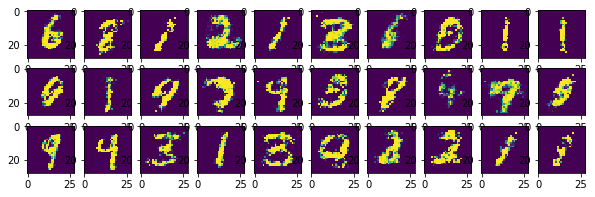

epoch: 24 	 last batch loss D: 1.042752742767334 	 last batch loss G: 1.445831537246704


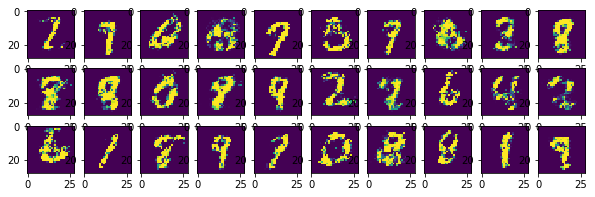

epoch: 25 	 last batch loss D: 1.0443525314331055 	 last batch loss G: 1.4774479866027832


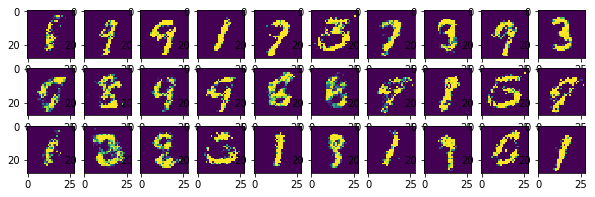

epoch: 26 	 last batch loss D: 1.010991096496582 	 last batch loss G: 1.384691834449768


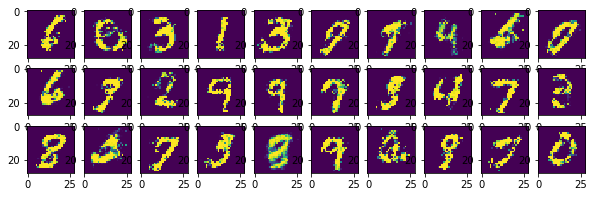

epoch: 27 	 last batch loss D: 0.9184402227401733 	 last batch loss G: 1.1666533946990967


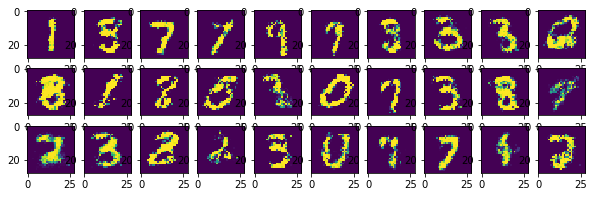

epoch: 28 	 last batch loss D: 1.1735894680023193 	 last batch loss G: 1.1805452108383179


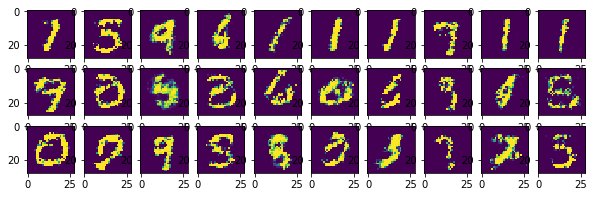

epoch: 29 	 last batch loss D: 1.2758500576019287 	 last batch loss G: 1.3997396230697632


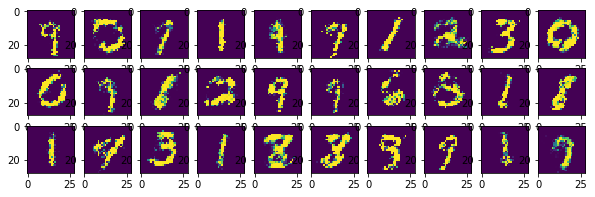

epoch: 30 	 last batch loss D: 1.2295284271240234 	 last batch loss G: 1.1162400245666504


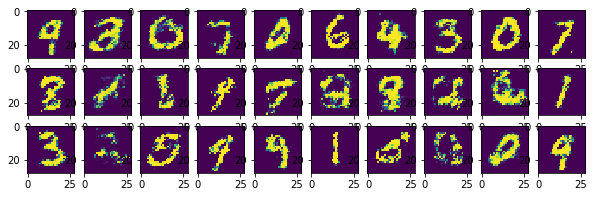

epoch: 31 	 last batch loss D: 1.0373919010162354 	 last batch loss G: 1.0483291149139404


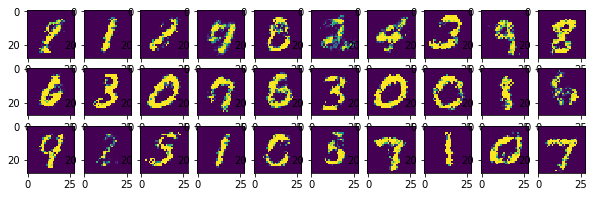

epoch: 32 	 last batch loss D: 1.1860792636871338 	 last batch loss G: 1.162607192993164


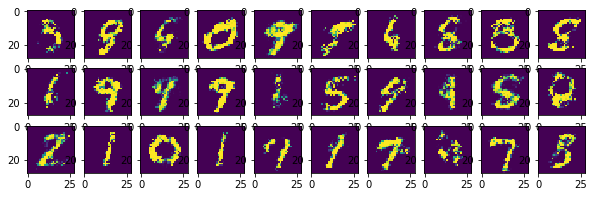

epoch: 33 	 last batch loss D: 0.9478310346603394 	 last batch loss G: 1.096038579940796


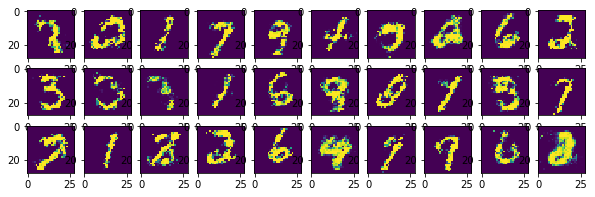

epoch: 34 	 last batch loss D: 1.173179268836975 	 last batch loss G: 1.2383272647857666


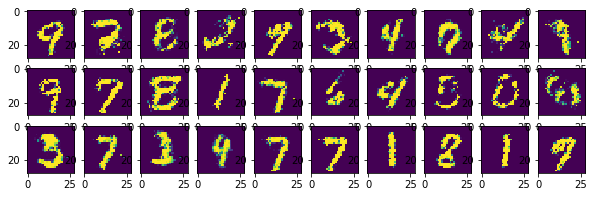

epoch: 35 	 last batch loss D: 1.011698842048645 	 last batch loss G: 1.1425801515579224


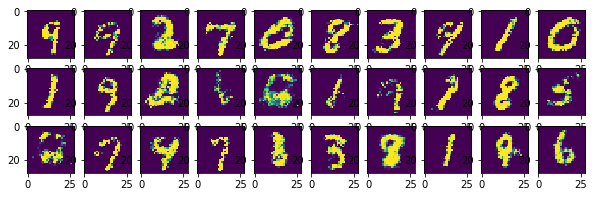

epoch: 36 	 last batch loss D: 1.031031847000122 	 last batch loss G: 1.2171506881713867


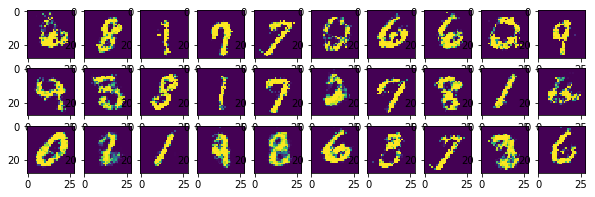

epoch: 37 	 last batch loss D: 0.8919996619224548 	 last batch loss G: 1.3455345630645752


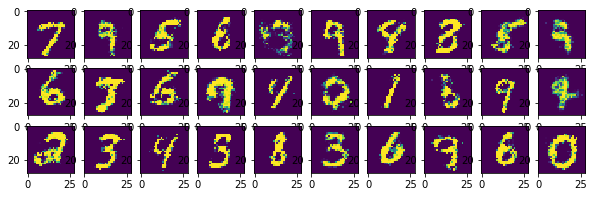

epoch: 38 	 last batch loss D: 1.144992709159851 	 last batch loss G: 1.297511100769043


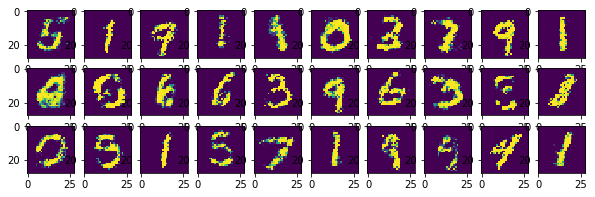

epoch: 39 	 last batch loss D: 1.020135760307312 	 last batch loss G: 1.2965444326400757


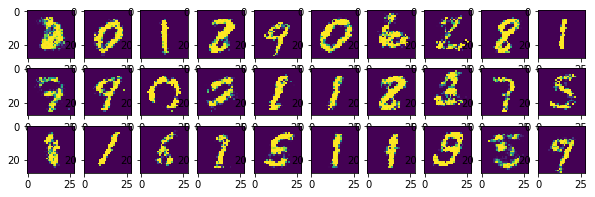

epoch: 40 	 last batch loss D: 1.2480117082595825 	 last batch loss G: 0.9442955255508423


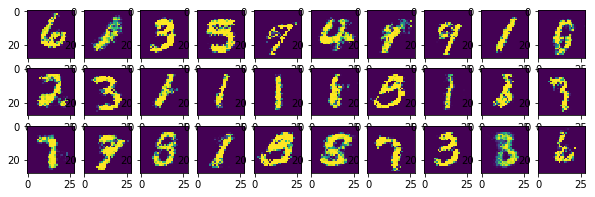

epoch: 41 	 last batch loss D: 1.190229058265686 	 last batch loss G: 1.1377983093261719


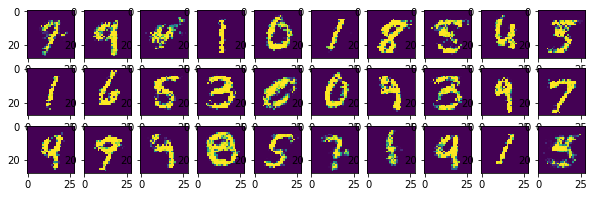

epoch: 42 	 last batch loss D: 1.2032318115234375 	 last batch loss G: 0.9106690883636475


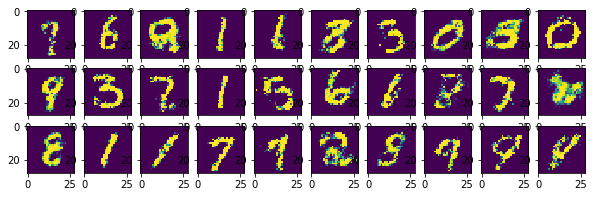

epoch: 43 	 last batch loss D: 1.0714962482452393 	 last batch loss G: 0.9462798237800598


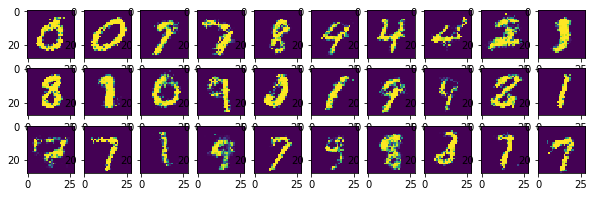

epoch: 44 	 last batch loss D: 1.1011488437652588 	 last batch loss G: 1.0608680248260498


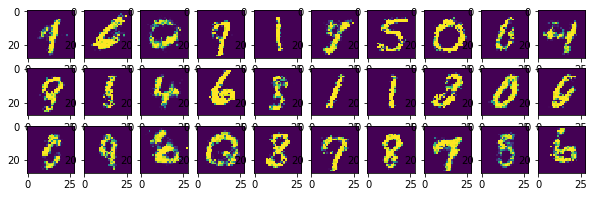

epoch: 45 	 last batch loss D: 1.2783405780792236 	 last batch loss G: 0.9050917625427246


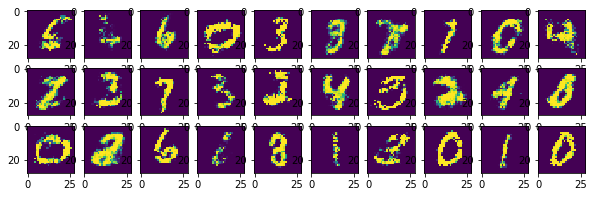

epoch: 46 	 last batch loss D: 1.0931637287139893 	 last batch loss G: 1.11094331741333


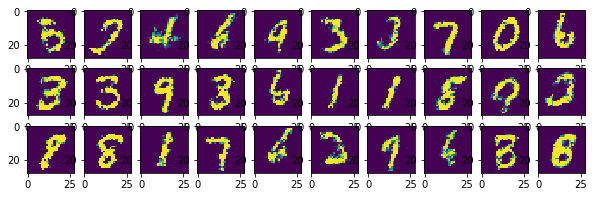

epoch: 47 	 last batch loss D: 1.1764116287231445 	 last batch loss G: 0.9934278130531311


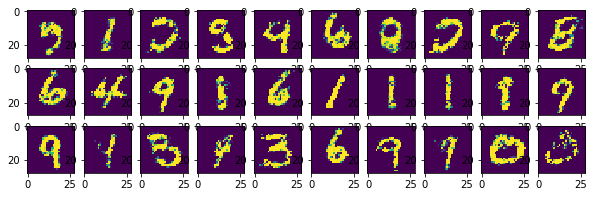

epoch: 48 	 last batch loss D: 1.1866934299468994 	 last batch loss G: 1.0296489000320435


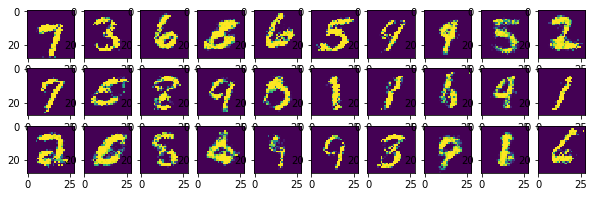

epoch: 49 	 last batch loss D: 1.178485631942749 	 last batch loss G: 1.198106288909912


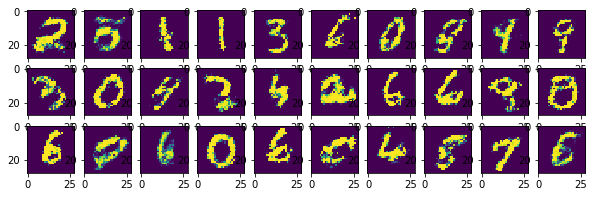

epoch: 50 	 last batch loss D: 1.4580764770507812 	 last batch loss G: 0.8992509841918945


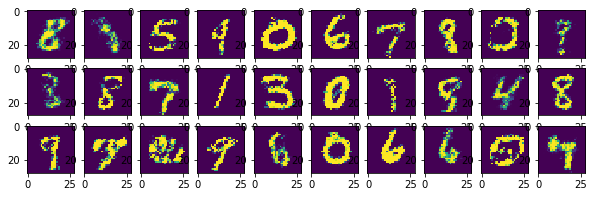

epoch: 51 	 last batch loss D: 1.1658134460449219 	 last batch loss G: 1.0000505447387695


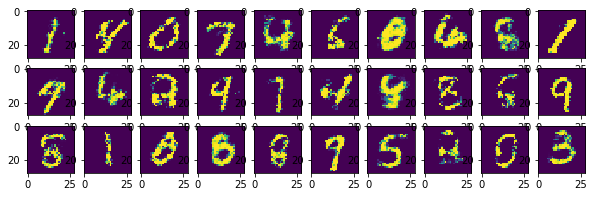

epoch: 52 	 last batch loss D: 1.2552629709243774 	 last batch loss G: 0.9418520927429199


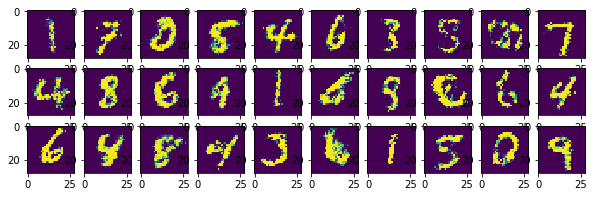

epoch: 53 	 last batch loss D: 1.1942875385284424 	 last batch loss G: 0.8503047823905945


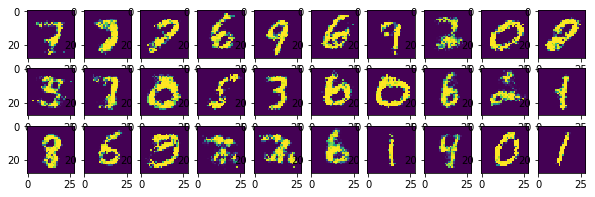

epoch: 54 	 last batch loss D: 1.3080731630325317 	 last batch loss G: 0.9547754526138306


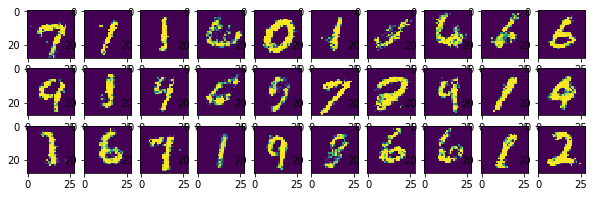

epoch: 55 	 last batch loss D: 1.1467459201812744 	 last batch loss G: 1.037130355834961


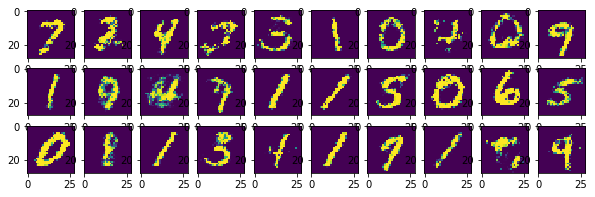

epoch: 56 	 last batch loss D: 1.144964337348938 	 last batch loss G: 0.9610611796379089


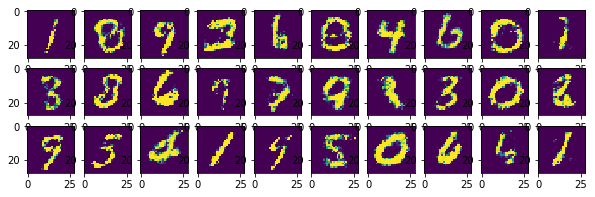

epoch: 57 	 last batch loss D: 1.3480539321899414 	 last batch loss G: 0.9609595537185669


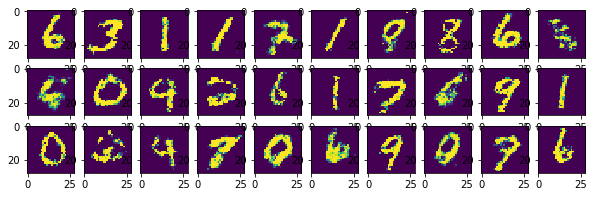

epoch: 58 	 last batch loss D: 1.3592979907989502 	 last batch loss G: 0.8884553909301758


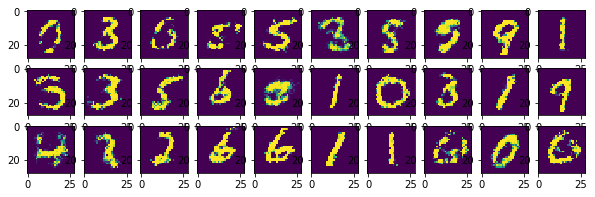

epoch: 59 	 last batch loss D: 1.275659441947937 	 last batch loss G: 0.8547694683074951


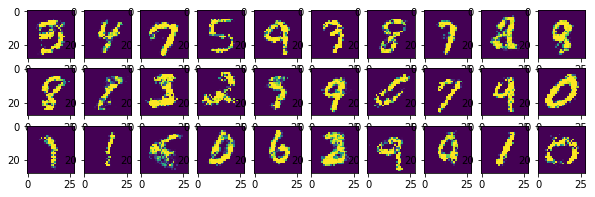

epoch: 60 	 last batch loss D: 1.254347562789917 	 last batch loss G: 0.9495608806610107


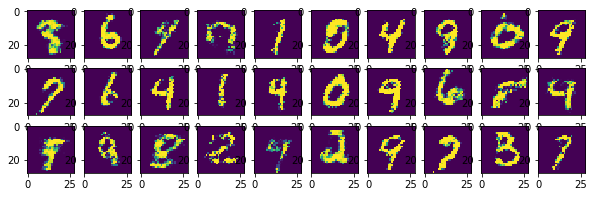

epoch: 61 	 last batch loss D: 1.162621259689331 	 last batch loss G: 0.9631021618843079


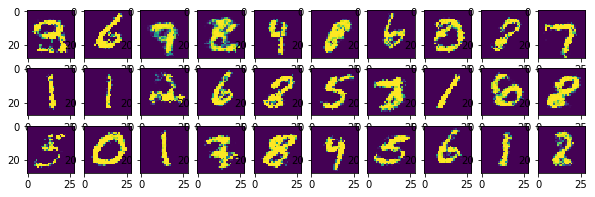

epoch: 62 	 last batch loss D: 1.3375470638275146 	 last batch loss G: 0.9892149567604065


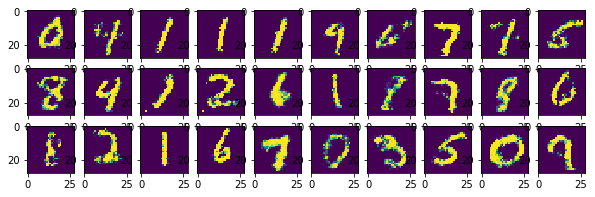

epoch: 63 	 last batch loss D: 1.1420409679412842 	 last batch loss G: 0.8848601579666138


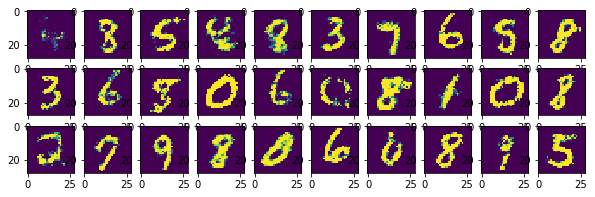

epoch: 64 	 last batch loss D: 1.2586321830749512 	 last batch loss G: 0.9516106247901917


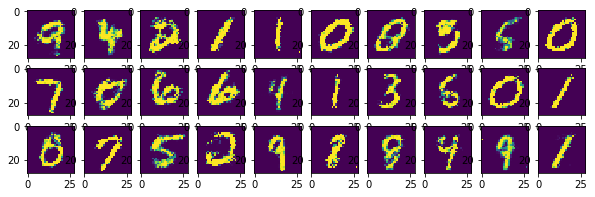

epoch: 65 	 last batch loss D: 1.1521878242492676 	 last batch loss G: 0.8628689050674438


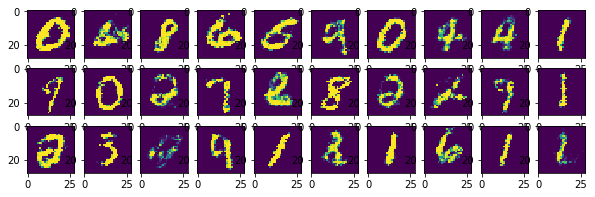

epoch: 66 	 last batch loss D: 1.2340137958526611 	 last batch loss G: 0.9604188799858093


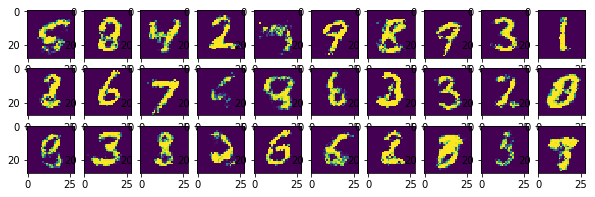

epoch: 67 	 last batch loss D: 1.282597541809082 	 last batch loss G: 1.156437873840332


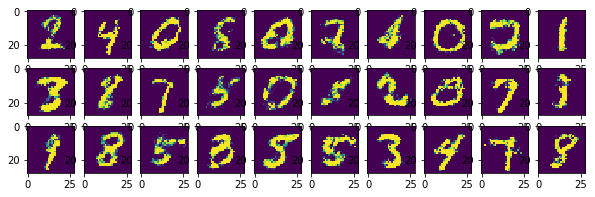

epoch: 68 	 last batch loss D: 1.2246761322021484 	 last batch loss G: 0.9311245679855347


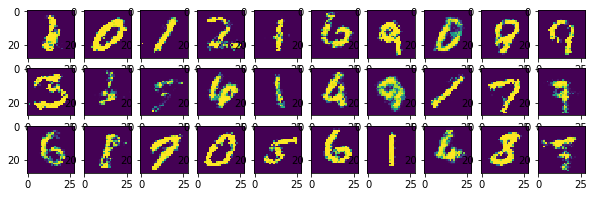

epoch: 69 	 last batch loss D: 1.1859097480773926 	 last batch loss G: 1.0432767868041992


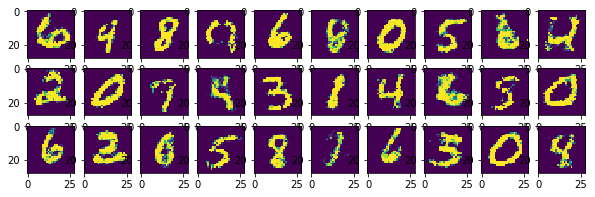

epoch: 70 	 last batch loss D: 1.2154080867767334 	 last batch loss G: 0.8845968246459961


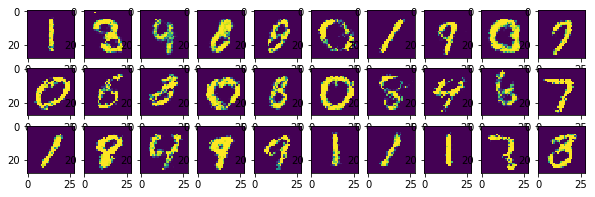

epoch: 71 	 last batch loss D: 1.3408963680267334 	 last batch loss G: 0.8066565990447998


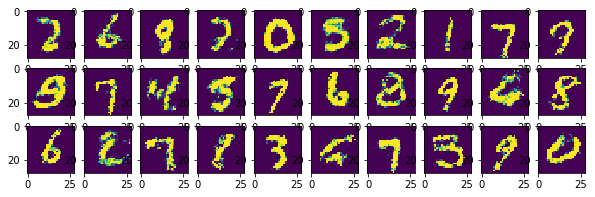

epoch: 72 	 last batch loss D: 1.3891041278839111 	 last batch loss G: 0.8440468907356262


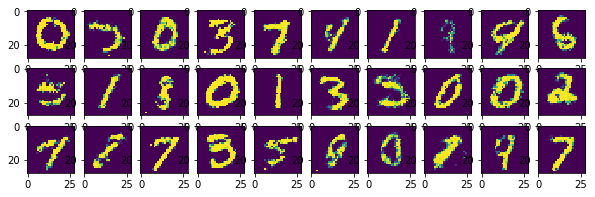

epoch: 73 	 last batch loss D: 1.330484390258789 	 last batch loss G: 0.9750558733940125


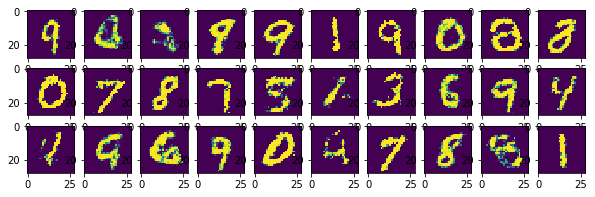

epoch: 74 	 last batch loss D: 1.1608645915985107 	 last batch loss G: 0.8378015756607056


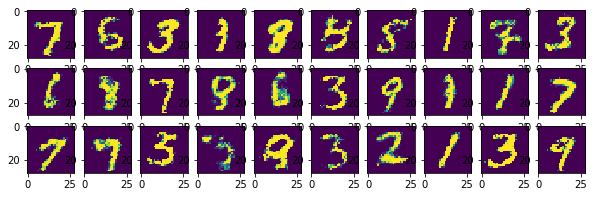

epoch: 75 	 last batch loss D: 1.262650728225708 	 last batch loss G: 0.8931858539581299


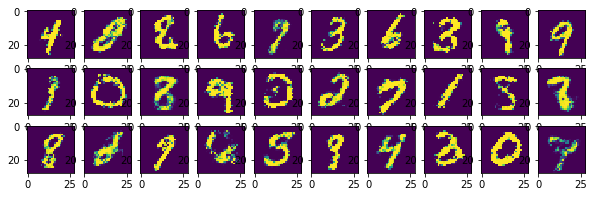

epoch: 76 	 last batch loss D: 1.5054019689559937 	 last batch loss G: 0.7718380689620972


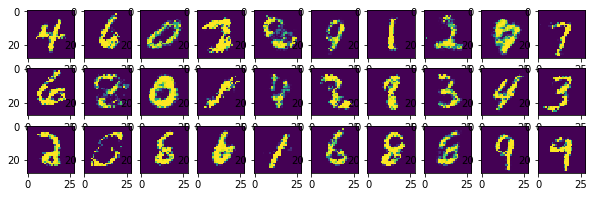

epoch: 77 	 last batch loss D: 1.3663815259933472 	 last batch loss G: 0.9382086992263794


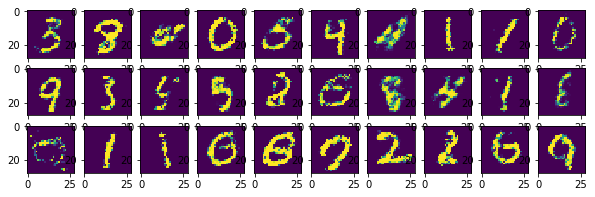

epoch: 78 	 last batch loss D: 1.2880871295928955 	 last batch loss G: 0.8275488615036011


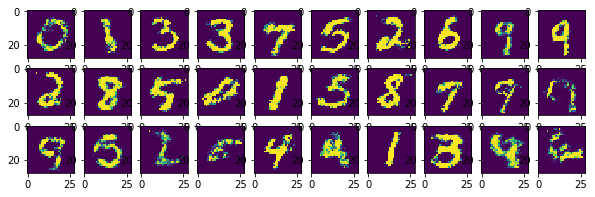

epoch: 79 	 last batch loss D: 1.3979589939117432 	 last batch loss G: 0.786334753036499


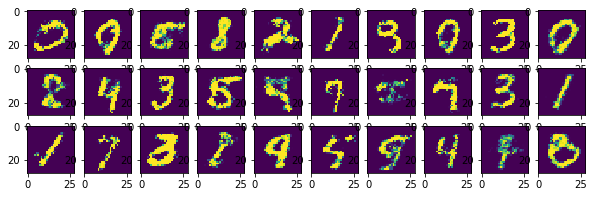

epoch: 80 	 last batch loss D: 1.1652261018753052 	 last batch loss G: 0.960007905960083


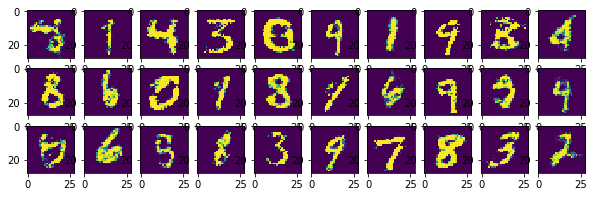

epoch: 81 	 last batch loss D: 1.364531397819519 	 last batch loss G: 0.8548214435577393


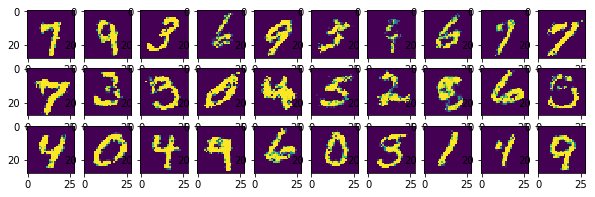

epoch: 82 	 last batch loss D: 1.4259669780731201 	 last batch loss G: 0.855774462223053


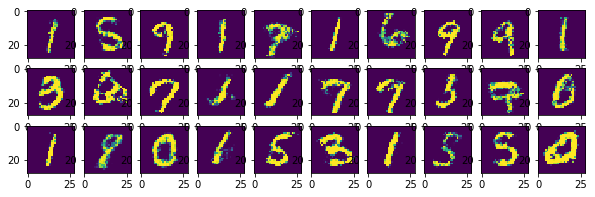

epoch: 83 	 last batch loss D: 1.2828938961029053 	 last batch loss G: 0.7932823896408081


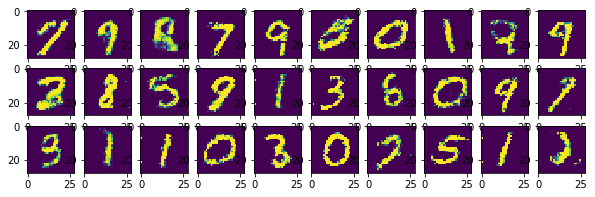

epoch: 84 	 last batch loss D: 1.2244834899902344 	 last batch loss G: 0.8421754240989685


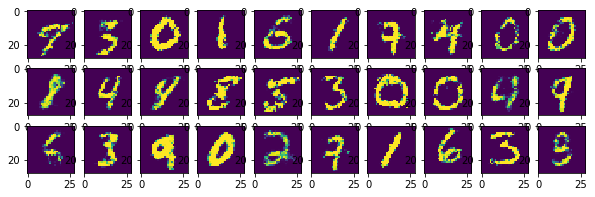

epoch: 85 	 last batch loss D: 1.2795559167861938 	 last batch loss G: 0.8890955448150635


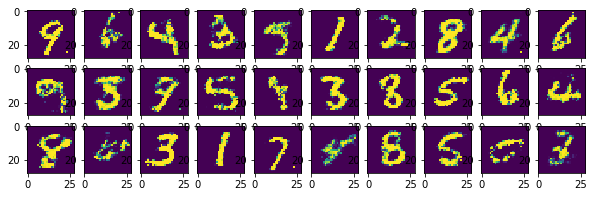

epoch: 86 	 last batch loss D: 1.3820021152496338 	 last batch loss G: 0.8467317819595337


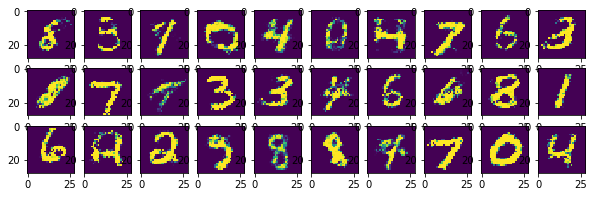

epoch: 87 	 last batch loss D: 1.2111625671386719 	 last batch loss G: 0.8389905691146851


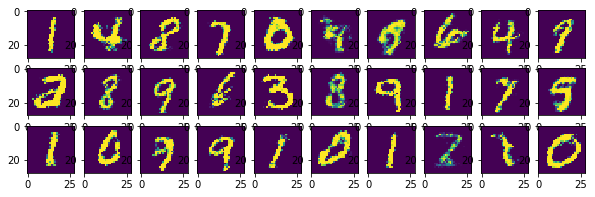

epoch: 88 	 last batch loss D: 1.2624671459197998 	 last batch loss G: 0.9442898631095886


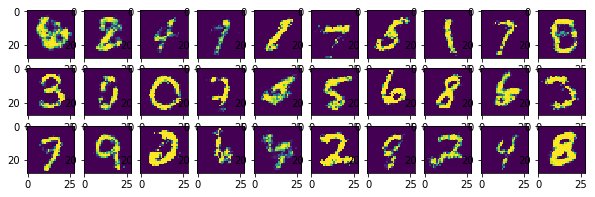

epoch: 89 	 last batch loss D: 1.359699010848999 	 last batch loss G: 0.7931385040283203


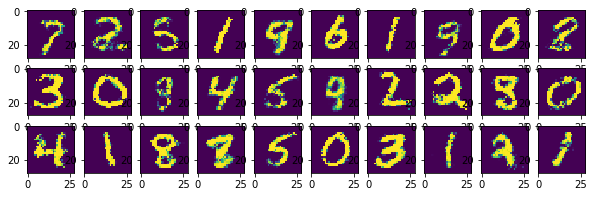

epoch: 90 	 last batch loss D: 1.3148589134216309 	 last batch loss G: 0.8964983224868774


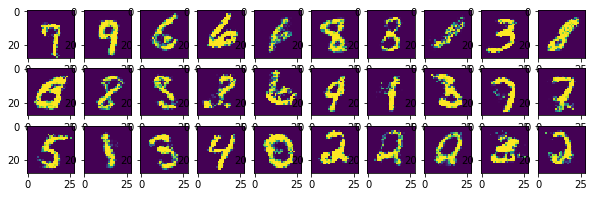

epoch: 91 	 last batch loss D: 1.1240229606628418 	 last batch loss G: 0.8562135696411133


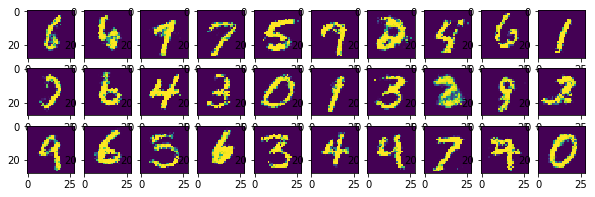

epoch: 92 	 last batch loss D: 1.2804179191589355 	 last batch loss G: 0.8717942237854004


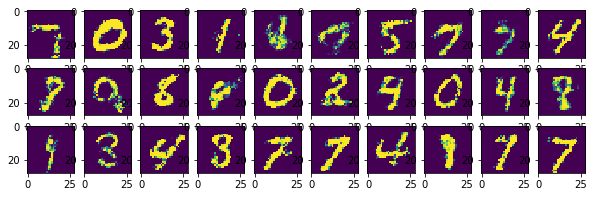

epoch: 93 	 last batch loss D: 1.2438151836395264 	 last batch loss G: 0.9056157469749451


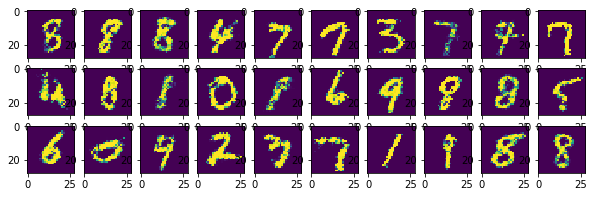

epoch: 94 	 last batch loss D: 1.3381714820861816 	 last batch loss G: 0.8449042439460754


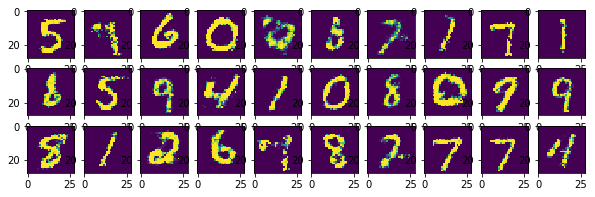

epoch: 95 	 last batch loss D: 1.162996768951416 	 last batch loss G: 0.9575011134147644


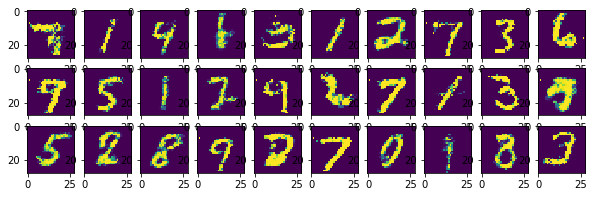

epoch: 96 	 last batch loss D: 1.2670938968658447 	 last batch loss G: 0.8237911462783813


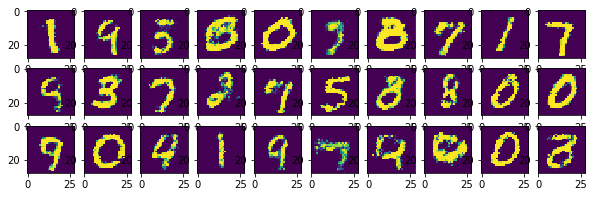

epoch: 97 	 last batch loss D: 1.2922475337982178 	 last batch loss G: 0.7994381189346313


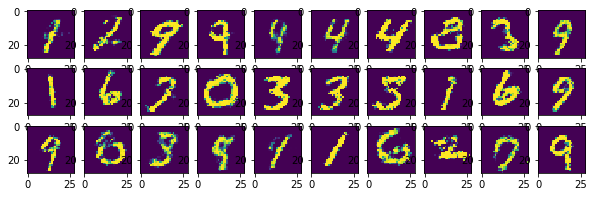

epoch: 98 	 last batch loss D: 1.262702226638794 	 last batch loss G: 0.9147624969482422


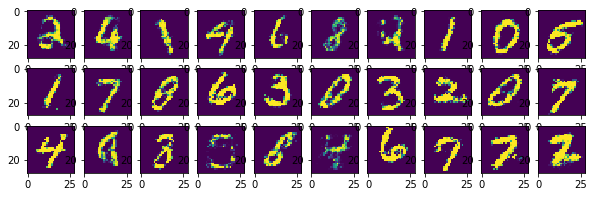

epoch: 99 	 last batch loss D: 1.3221588134765625 	 last batch loss G: 0.856677770614624


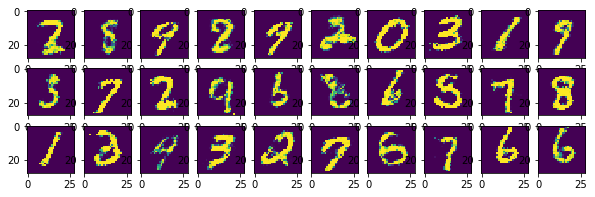

In [12]:
# [CHANGED] EPSILON is not needed anymore
# EPSILON = 1e-6

for epoch in range(N_EPOCH):
    for i, (img, label) in enumerate(train_loader):
        img = img.flatten(start_dim=1)

        real_img = img
        if CUDA:
            real_img = real_img.cuda()

        fake_labels = torch.zeros(img.shape[0], 1).cuda()
        real_labels = torch.ones(img.shape[0], 1).cuda()

        #########################
        z = torch.randn(img.shape[0], 128)
        if CUDA:
            z = z.cuda()
        fake_img = generator(z)

        opt_D.zero_grad()
        # [CHANGED] BCE is more stable
        #         loss_d = -(torch.log(EPSILON + 1 - discriminator(fake_img.detach())) + 
        #                    torch.log(EPSILON + discriminator(real_img))).mean()
        loss_d = (F.binary_cross_entropy(discriminator(fake_img.detach()), fake_labels) +
                  F.binary_cross_entropy(discriminator(real_img), real_labels))
        loss_d.backward()
        opt_D.step()
        #########################
        z = torch.randn(img.shape[0], 128)
        if CUDA:
          z = z.cuda()
        fake_img = generator(z)

        opt_G.zero_grad()
        # [CHANGED] BCE is more stable
        #     loss_g = - torch.log(EPSILON + discriminator(fake_img)).mean()
        loss_g = F.binary_cross_entropy(discriminator(fake_img), real_labels)
        loss_g.backward()
        opt_G.step()
        #########################

    
    print("epoch: {} \t last batch loss D: {} \t last batch loss G: {}".format(epoch, loss_d.item(), loss_g.item()))

    # [CHANGED] Better output
    for i in range(3):
        for j in range(10):
            plt.subplot(3, 10, i * 10 + j + 1)
            plt.imshow(fake_img[i * 10 + j].detach().cpu().view(28, 28).numpy())
    plt.show()
